
<div style="background-color:rgba(0, 225, 0, 0.15)">    

# Assessing data
 Phase II clinical trial data that compares the efficacy and safety of a new oral insulin to treat diabetes
You'll learn to distinguish between **dirty** (quality issues) data and **messy** (tifiness issues) data
You'll assess the data visually and programmatically to identify:
- Data quality issues
- Tidiness issues <br>
You'll learn about data quality dimensions and categorize each of the data quality issues identified above into its appropriate dimension

</div>







<div style="background-color:rgba(0, 225, 0, 0.15)">    

# Visual Assessment: Acquaint Yourself

</div>





This Auralin Phase II clinical trial dataset comes in three tables: `patients`, `treatments`, and `adverse_reactions`. Acquaint yourself with them through visual assessment below.

### Gather

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display as disp
%matplotlib inline

In [2]:
patients = pd.read_csv('patients.csv')
treatments = pd.read_csv('treatments.csv')
adverse_reactions = pd.read_csv('adverse_reactions.csv')

### Assess
In the cells below, each column of each table in this clinical trial dataset is described. To see the table that goes hand in hand with these descriptions, display each table in its entirety by displaying the pandas DataFrame that it was gathered into. This task is the mechanical part of visual assessment in pandas.

In [3]:
# Display the patients table
patients

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852.0,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341.0,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110.0,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109.0,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7


`patients` columns:
- **patient_id**: the unique identifier for each patient in the [Master Patient Index](https://en.wikipedia.org/wiki/Enterprise_master_patient_index) (i.e. patient database) of the pharmaceutical company that is producing Auralin
- **assigned_sex**: the assigned sex of each patient at birth (male or female)
- **given_name**: the given name (i.e. first name) of each patient
- **surname**: the surname (i.e. last name) of each patient
- **address**: the main address for each patient
- **city**: the corresponding city for the main address of each patient
- **state**: the corresponding state for the main address of each patient
- **zip_code**: the corresponding zip code for the main address of each patient
- **country**: the corresponding country for the main address of each patient (all United states for this clinical trial)
- **contact**: phone number and email information for each patient
- **birthdate**: the date of birth of each patient (month/day/year). The [inclusion criteria](https://en.wikipedia.org/wiki/Inclusion_and_exclusion_criteria) for this clinical trial is  age >= 18 *(there is no maximum age because diabetes is a [growing problem](http://www.diabetes.co.uk/diabetes-and-the-elderly.html) among the elderly population)*
- **weight**: the weight of each patient in pounds (lbs)
- **height**: the height of each patient in inches (in)
- **bmi**: the Body Mass Index (BMI) of each patient. BMI is a simple calculation using a person's height and weight. The formula is BMI = kg/m<sup>2</sup> where kg is a person's weight in kilograms and m<sup>2</sup> is their height in metres squared. A BMI of 25.0 or more is overweight, while the healthy range is 18.5 to 24.9. *The [inclusion criteria](https://en.wikipedia.org/wiki/Inclusion_and_exclusion_criteria) for this clinical trial is 16 >= BMI >= 38.*


<div style="background-color:rgba(0, 225, 0, 0.15)">    

# patients data issues

### quality issues
- zip codes are numerical
- zip codes are non standard, 5 digits (should be strings)  
- Nuedorf height is 27, should be 72
- state names inconsistent (some are abbreviations some full)
- Dsvid gustafsan
    
### tidiness issues 
- 

</div>


In [4]:
# Display the treatments table
treatments

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
...,...,...,...,...,...,...,...
275,albina,zetticci,45u - 51u,-,7.93,7.73,0.20
276,john,teichelmann,-,49u - 49u,7.90,7.58,NaN
277,mathea,lillebø,23u - 36u,-,9.04,8.67,0.37
278,vallie,prince,31u - 38u,-,7.64,7.28,0.36


350 patients participated in this clinical trial. None of the patients were using Novodra (a popular injectable insulin) or Auralin (the oral insulin being researched) as their primary source of insulin before.  All were experiencing elevated HbA1c levels.

All 350 patients were treated with Novodra to establish a baseline HbA1c level and insulin dose. After four weeks, which isn’t enough time to capture all the change in HbA1c that can be attributed by the switch to Auralin or Novodra:
- 175 patients switched to Auralin for 24 weeks
- 175 patients continued using Novodra for 24 weeks

`treatments` columns:
- **given_name**: the given name of each patient in the Master Patient Index that took part in the clinical trial
- **surname**: the surname of each patient in the Master Patient Index that took part in the clinical trial
- **auralin**: the baseline median daily dose of insulin from the week prior to switching to Auralin (the number before the dash) *and* the ending median daily dose of insulin at the end of the 24 weeks of treatment measured over the 24th week of treatment (the number after the dash). Both are measured in units (shortform 'u'), which is the [international unit](https://en.wikipedia.org/wiki/International_unit) of measurement and the standard measurement for insulin.
- **novodra**: same as above, except for patients that continued treatment with Novodra
- **hba1c_start**: the patient's HbA1c level at the beginning of the first week of treatment. HbA1c stands for Hemoglobin A1c. The [HbA1c test](https://depts.washington.edu/uwcoe/healthtopics/diabetes.html) measures what the average blood sugar has been over the past three months. It is thus a powerful way to get an overall sense of how well diabetes has been controlled. Everyone with diabetes should have this test 2 to 4 times per year. Measured in %.
- **hba1c_end**: the patient's HbA1c level at the end of the last week of treatment
- **hba1c_change**: the change in the patient's HbA1c level from the start of treatment to the end, i.e., `hba1c_start` - `hba1c_end`. For Auralin to be deemed effective, it must be "noninferior" to Novodra, the current standard for insulin. This "noninferiority" is statistically defined as the upper bound of the 95% confidence interval being less than 0.4% for the difference between the mean HbA1c changes for Novodra and Auralin (i.e. Novodra minus Auralin).


<div style="background-color:rgba(0, 225, 0, 0.15)">    

# treatments data issues

### quality issues
- missng data in HbA1c change column   
- u's with the drug doses
- names are lower case (should be upper to match with patients table)
- mising data (280 rows compared to 350 of patients table)
    
### tidiness issues 
- redundant drug column (should be just one column)

</div>




In [5]:
# Display the adverse_reactions table
adverse_reactions

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation
5,jasmine,sykes,hypoglycemia
6,louise,johnson,hypoglycemia
7,albinca,komavec,hypoglycemia
8,noe,aranda,hypoglycemia
9,sofia,hermansen,injection site discomfort


`adverse_reactions` columns:
- **given_name**: the given name of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)
- **surname**: the surname of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)
- **adverse_reaction**: the adverse reaction reported by the patient

Additional useful information:
- [Insulin resistance varies person to person](http://www.tudiabetes.org/forum/t/how-much-insulin-is-too-much-on-a-daily-basis/9804/5), which is why both starting median daily dose and ending median daily dose are required, i.e., to calculate change in dose.
- It is important to test drugs and medical products in the people they are meant to help. People of different age, race, sex, and ethnic group must be included in clinical trials. This [diversity](https://www.clinicalleader.com/doc/an-fda-perspective-on-patient-diversity-in-clinical-trials-0001) is reflected in the `patients` table.
- Ensuring column names are descriptive enough is an important step in acquainting yourself with the data. 'Descriptive enough' is subjective. Ideally you want short column names (so they are easier to type and read in code form) but also fully descriptive. Length vs. descriptiveness is a tradeoff and common debate (a [similar debate](https://softwareengineering.stackexchange.com/questions/176582/is-there-an-excuse-for-short-variable-names) exists for variable names). The *auralin* and *novodra* column names are probably not descriptive enough, but you'll address that later so don't worry about that for now.


<div style="background-color:rgba(0, 225, 0, 0.15)">    

# adverse_reactions data issues

### quality issues
- names are lower case (should be upper to match with patients table)   
    
### tidiness issues 
- 

</div>


# Data Quality Dimensions
Data quality dimensions help guide your thought process while assessing and also cleaning. The four main data quality dimensions are:

- **Completeness**: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?
- **Validity**: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
- **Accuracy**: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.
- **Consistency**: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.


<div style="background-color:rgba(0, 225, 0, 0.15)">    

# Programatic assessment: look at entire data

</div>


In [16]:
disp(patients.info())
disp(patients.describe())
disp(patients.sample(3)) # randomly sample without replacement
disp(patients.city.value_counts()['New York'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


None

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
456,457,male,Zikoranaudodimma,Chinedum,3402 Kildeer Drive,Newport News,VA,23602.0,United States,ZikoranaudodimmaChinedum@cuvox.de1 757 269 6500,12/25/1935,150.5,67,23.6
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
293,294,male,Jeramy,Hopkins,2651 Black Oak Hollow Road,Walnut Creek,California,94597.0,United States,JeramyAHopkins@teleworm.us408-834-4087,9/11/1995,179.1,71,25.0


18

In [17]:
disp(treatments.info())
disp(treatments.describe())
disp(treatments.sample(3)) # randomly sample without replacement

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    280 non-null    object 
 1   surname       280 non-null    object 
 2   auralin       280 non-null    object 
 3   novodra       280 non-null    object 
 4   hba1c_start   280 non-null    float64
 5   hba1c_end     280 non-null    float64
 6   hba1c_change  171 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


None

,hba1c_start,hba1c_end,hba1c_change
count,280.000000,280.000000,171.000000
mean,7.985929,7.589286,0.546023
std,0.568638,0.569672,0.279555
min,7.500000,7.010000,0.200000
25%,7.660000,7.270000,0.340000
50%,7.800000,7.420000,0.380000
75%,7.970000,7.570000,0.920000
max,9.950000,9.580000,0.990000


,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
267,leon,scholz,-,38u - 32u,7.72,7.29,0.93
75,mackenzie,mckay,-,44u - 43u,9.87,9.48,0.39
240,rocco,christie,-,42u - 40u,7.96,7.62,NaN


In [18]:
disp(adverse_reactions.info())
disp(adverse_reactions.describe())
disp(adverse_reactions.sample(3)) # randomly sample without replacement

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   given_name        34 non-null     object
 1   surname           34 non-null     object
 2   adverse_reaction  34 non-null     object
dtypes: object(3)
memory usage: 944.0+ bytes


None

,given_name,surname,adverse_reaction
count,34,34,34
unique,34,33,6
top,jakob,johnson,hypoglycemia
freq,1,2,19


,given_name,surname,adverse_reaction
8,noe,aranda,hypoglycemia
3,flavia,fiorentino,cough
19,finley,chandler,headache


In [22]:
list(patients)

['patient_id',
 'assigned_sex',
 'given_name',
 'surname',
 'address',
 'city',
 'state',
 'zip_code',
 'country',
 'contact',
 'birthdate',
 'weight',
 'height',
 'bmi']

In [23]:
list(treatments)

['given_name',
 'surname',
 'auralin',
 'novodra',
 'hba1c_start',
 'hba1c_end',
 'hba1c_change']

In [24]:
list(adverse_reactions)

['given_name', 'surname', 'adverse_reaction']

In [25]:
# To check for same column names among dataframes

all_columns = pd.Series(list(patients) + list(treatments) + list(adverse_reactions))
all_columns[all_columns.duplicated()]

14    given_name
15       surname
21    given_name
22       surname
dtype: object


<div style="background-color:rgba(0, 225, 0, 0.15)">    

# patients data issues

### quality issues
- **[by visualization: accuracy issue]** Nuedorf height is 27, should be 72 
- **[by visualization: consistency issue]** state names inconsistent (some are abbreviations some full)
- **[by visualization: accuracy issue]** Dsvid gustafsan should be David
- **[by visualization: validy issue]** zip codes are non standard, all should be 5 digits<br><br>
    

- **[programatically: erroneous dtype/ validy issue]** zip codes are numerical (should be strings)
- **[programatically: erroneous dtype/ validy issue]** birth dates should be date time objects
- **[programatically: erroneous dtype/ validy issue]** state vairable should be categorical (optional)
- **[programatically: erroneous dtype/ validy issue]** assigned_sex vairable should be categorical (optional)
- **[programatically: validy/consistency issue]** contact column has inconsistent phone numbers
- **[programatically: validy issue]** default john doe data
- **[programatically: validy issue]** multiple records for Jacobson, Gerston and Taylor
- **[programatically: validy issue]** Zaitseva weight in kgs
    
### tidiness issues 
- **[by visualization]** contact column needs to be 2 columns for phone and email
 
########################################################################################################
   
# treatments data issues

### quality issues
- **[by visualization: validy issue]** u's with the drug doses 
- **[by visualization: consistency issue]** names are lower case (should be upper to match with patients table) <br><br>
    
- **[programatically: completeness issue]** missng data in HbA1c change (171) column compared to other columns (280)   
- **[programatically: completeness issue]** mising data (280 rows compared to 350 of patients table)
- **[programatically: accuracy issue]** in HbA1c change column the 4s have been mistaken as 9s (supposedly)  
- **[programatically: erroneous dtype/ validy issue]** auralin column should be numerical (may be 2 separate columns)
- **[programatically: erroneous dtype/ validy issue]** novodra column should be numerical (may be 2 separate columns)
- **[programatically: validy issue]** nulls represented as dashes in drug (auralin/ novodra) columns 
### tidiness issues 
- **[by visualization]** redundant drug column (should a column for each dosage and another column for type of drug) 
    
########################################################################################################
    
# adverse_reactions data issues

### quality issues
- **[by visualization: consistency issue]** names are lower case (should be upper to match with patients table)<br><br>
    
### tidiness issues 

tidiness link: https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html
</div>



# Final column names in 2 tables (which can be joined together)

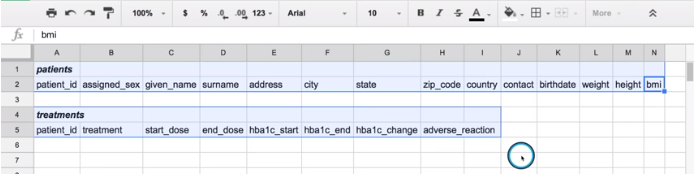

# Sources of Dirty Data

- completenss issues (missing data)
- validity issues (values or data types)
- accuracy issues in values
- consistency issues in recording

Dirty data = low quality data = content issues

There are lots of sources of dirty data. Basically, anytime humans are involved, there's going to be dirty data. There are lots of ways in which we touch data we work with.

- We're going to have user entry errors.
- In some situations, we won't have any data coding standards, or where we do have standards they'll be poorly applied, - causing problems in the resulting data
- We might have to integrate data where different schemas have been used for the same type of item.
- We'll have legacy data systems, where data wasn't coded when disc and memory constraints were much more restrictive than they are now. Over time systems evolve. Needs change, and data changes.
- Some of our data won't have the unique identifiers it should.
- Other data will be lost in transformation from one format to another.
- And then, of course, there's always programmer error.
- And finally, data might have been corrupted in transmission or storage by cosmic rays or other physical phenomenon. So hey, one that's not our fault.

# Sources of Messy Data

Issues other than quality that would make analysis harder or add further steps before data can be analyzed properly.

Messy data = untidy data = structural issues

Messy data is usually the result of poor data planning. Or a lack of awareness of the benefits of tidy data. Fortunately, messy data is usually much more easily addressable than most of the sources of dirty data mentioned above.

# Iterating process
The concept of iterating isn't that applicable for clinical trials given the rigor involved in their planning. But, theoretically, the following situations could arise that require iteration:

- Maybe you (as the data analyst or data scientist on the clinical trial research team) realized your statistical power calculations were wrong, and you needed to recruit more patients to make your study statistically significant. You'd also have to do revisit gathering in this scenario.
- Maybe you realized you were missing a key piece of patient information, like patient blood type (again, unlikely given the rigor of clinical trials, but mistakes happen) because you discovered new research that related insulin resistance to blood type. You'd also have to do revisit gathering in this scenario.
- Maybe you finished assessing, started cleaning, and spotted another data quality issue. Revisiting assessing to add these assessments to your notes is fine.